# **Enigma Machine**

Project académique par :
*   Rafiq MAHROUG
*   Magnolia Amoussou Guenou

---
*Université Paris Cité - M2 MIAGE 2025/2026 - Cryptographie & Blockchain*

---

In this notebook Jupyter you will find the blocks of code that represents the classes **(class.py)** which are the components of the Enigma Machine and **are not required to be excuted, before excuting the main code since the main code has all the classes included, these classes are meant to be used in a desktop version of this code**.

**(main.py)** is the main part which is the functional machine, it has all the classes along with the main program that generates a talk box where the user can :
*   Configure the key
*   Encipher a message


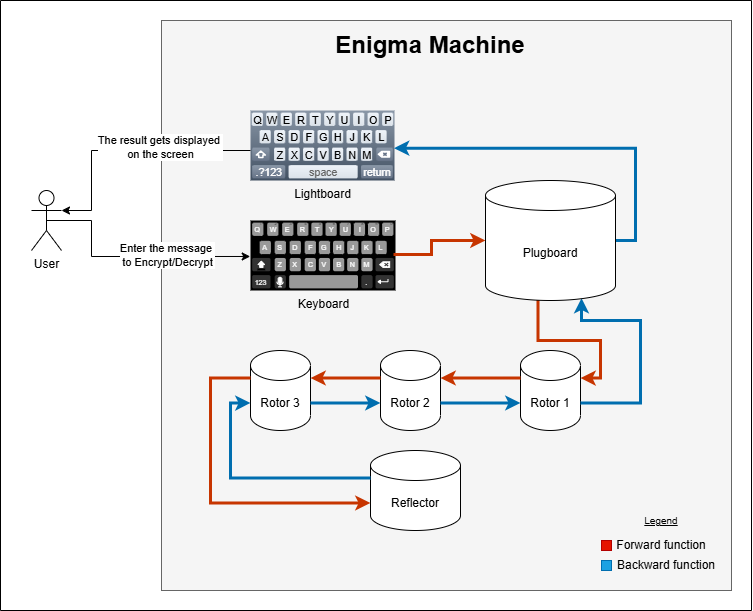

# Keyboard.py

In [ ]:
"""
Keyboard.py
This class is used to convert between letters and their position (number) on the keyboard.
It respresents the keyboard as a list of letters in the Enigma Machine's alphabet.

It has two methods:
 - The forward method takes a letter and returns its position on the keyboard.
 - The backward method takes a position and returns the letter at that position.
"""
class Keyboard:

  def forward(self, letter):
    position = "ABCDEFGHIJKLMNOPQRSTUVWXYZ".find(letter)
    return position

  def backward(self, position):
    letter = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"[position]
    return letter

  def draw(     )

# Plugboard.py

In [ ]:
"""
Plugboard.py
This class is used to connect pairs of letters in the Enigma Machine.

It has two pairs of alphabet : left and right.

It has two methods:
 - The forward method takes a position and returns the position of the letter connected to it.
 - The backward method takes a position and returns the position of the letter connected to it.

"""
class Plugboard:

  def __init__(self, pairs):
    self.left = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    self.right = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

    for pair in pairs:
      A = pair[0]
      B = pair[1]
      position_A = self.left.find(A)
      position_B = self.left.find(B)
      self.left = self.left[:position_A] + B + self.left[position_A+1:]
      self.left = self.left[:position_B] + A + self.left[position_B+1:]

  def forward(self, position):
    letter = self.right[position]
    position = self.left.find(letter)
    return position

  def backward(self, position):
    letter = self.left[position]
    position = self.right.find(letter)
    return position

# Rotor.py

In [ ]:
"""
Rotor.py
This class is used to represent a rotor in the Enigma Machine

It has these methods:
 - The forward method takes a position and returns the position of the letter after passing through the rotor.
 - The backward method takes a position and returns the position of the letter before passing through the rotor.
 - The show method prints the rotor's wiring.
 - The rotate method rotates the rotor by one position.
 - The rotate_to_specific_letter method rotates the rotor to a specific letter.

"""
class Rotor:

  def __init__(self, wiring, notch):
    self.left = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    self.right = wiring
    self.notch = notch

  def forward(self, position):
    letter = self.right[position]
    position = self.left.find(letter)
    return position

  def backward(self, position):
    letter = self.left[position]
    position = self.right.find(letter)
    return position

  def show(self):
    print(self.left)
    print(self.right)
    print()

  def set_ring(self, position):
    # Backward rotation of the rotor
    self.rotate(position - 1, forward=False)

    # Adjusting the notch
    notch_position = "ABCDEFGHIJKLMNOPQRSTUVWXYZ".find(self.notch)
    self.notch = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"[(notch_position - position) % 26]

  def rotate(self, n = 1, forward = True):
    for i in range(n):
      if forward:
        self.left = self.left[1:] + self.left[0]
        self.right = self.right[1:] + self.right[0]
      else:
        self.left = self.left[25] + self.left[:25]
        self.right = self.right[25] + self.right[:25]

  def rotate_to_specific_letter(self, letter):
    n = "ABCDEFGHIJKLMNOPQRSTUVWXYZ".find(letter)
    self.rotate(n)

# Reflector.py

In [ ]:
"""
Reflector.py
This class is used to represent a reflector in the Enigma Machine

It works just like the rotor but instead of forward and backward it is just a mirror.

We copied the same code from the rotor class.

"""
class Reflector:

  def __init__(self, wiring):
    self.left = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    self.right = wiring

  def reflect(self, position):
    letter = self.right[position]
    position = self.left.find(letter)
    return position

# Enigma.py

In [ ]:
"""
Enigma.py
This class is used to represent an Enigma Machine

An Enigma machine has these components :
 - A keyboard
 - A plugboard
 - Three rotors (At least)
 - A reflector

It has one method which is symetrical for encoding and decoding :
 - It takes a letter and returns the enciphered letter.

The rotation of the rotors is done automatically after each letter is encoded
 - Rotor 3 rotates every time a letter is encoded
 - Rotor 2 rotates when Rotor 3 reaches its notch
 - Rotor 1 rotates when Rotor 2 reaches its notch
 - There's also what is known as double stepping where all the rotors rotate when a Rotor 2 reaches its notch.
"""
class Enigma:

  def __init__(self, keyboard, plugboard, rotor_1, rotor_2, rotor_3, reflector):
    self.keyboard = keyboard
    self.plugboard = plugboard
    self.rotor_1 = rotor_1
    self.rotor_2 = rotor_2
    self.rotor_3 = rotor_3
    self.reflector = reflector

  def set_key(self, key):
    self.rotor_1.rotate_to_specific_letter(key[0])
    self.rotor_2.rotate_to_specific_letter(key[1])
    self.rotor_3.rotate_to_specific_letter(key[2])

  def set_ring_settings(self, ring_settings):
    self.rotor_1.set_ring(ring_settings[0])
    self.rotor_2.set_ring(ring_settings[1])
    self.rotor_3.set_ring(ring_settings[2])


  def encipher(self, letter):
    # Rotaion of the rotors
    if self.rotor_3.left[0] == self.rotor_3.notch and self.rotor_2.left[0] != self.rotor_2.notch:
      self.rotor_1.rotate()
      self.rotor_2.rotate()
      self.rotor_3.rotate()
    elif self.rotor_2.left[0] == self.rotor_2.notch:
      self.rotor_1.rotate()
      self.rotor_2.rotate()
      self.rotor_3.rotate()
    elif self.rotor_3.left[0] == self.rotor_3.notch:
      self.rotor_2.rotate()
      self.rotor_3.rotate()
    else:
      self.rotor_3.rotate()

    # The letter triggers a signal that goes through the machine and then comes back as an enciphered letter
    position = self.keyboard.forward(letter)
    position = self.plugboard.forward(position)
    position = self.rotor_3.forward(position)
    position = self.rotor_2.forward(position)
    position = self.rotor_1.forward(position)
    position = self.reflector.reflect(position)
    position = self.rotor_1.backward(position)
    position = self.rotor_2.backward(position)
    position = self.rotor_3.backward(position)
    position = self.plugboard.backward(position)
    letter = self.keyboard.backward(position)
    return letter

# This is the main part, when excuted you will get a talk box to set up the key and encrypt/decrypt and message
# Main.py

In [ ]:
################################################################################
# Keyboard
################################################################################
class Keyboard:

  def forward(self, letter):
    position = "ABCDEFGHIJKLMNOPQRSTUVWXYZ".find(letter)
    return position

  def backward(self, position):
    letter = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"[position]
    return letter

class Plugboard:

  def __init__(self, pairs):
    self.left = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    self.right = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

    for pair in pairs:
      A = pair[0]
      B = pair[1]
      position_A = self.left.find(A)
      position_B = self.left.find(B)
      self.left = self.left[:position_A] + B + self.left[position_A+1:]
      self.left = self.left[:position_B] + A + self.left[position_B+1:]

  def forward(self, position):
    letter = self.right[position]
    position = self.left.find(letter)
    return position

  def backward(self, position):
    letter = self.left[position]
    position = self.right.find(letter)
    return position

################################################################################
# Rotor
################################################################################
class Rotor:

  def __init__(self, wiring, notch):
    self.left = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    self.right = wiring
    self.notch = notch

  def forward(self, position):
    letter = self.right[position]
    position = self.left.find(letter)
    return position

  def backward(self, position):
    letter = self.left[position]
    position = self.right.find(letter)
    return position

  def show(self):
    print(self.left)
    print(self.right)
    print()

  def set_ring(self, position):
    # Backward rotation of the rotor
    self.rotate(position - 1, forward=False)

    # Adjusting the notch
    notch_position = "ABCDEFGHIJKLMNOPQRSTUVWXYZ".find(self.notch)
    self.notch = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"[(notch_position - position) % 26]

  def rotate(self, n = 1, forward = True):
    for i in range(n):
      if forward:
        self.left = self.left[1:] + self.left[0]
        self.right = self.right[1:] + self.right[0]
      else:
        self.left = self.left[25] + self.left[:25]
        self.right = self.right[25] + self.right[:25]

  def rotate_to_specific_letter(self, letter):
    n = "ABCDEFGHIJKLMNOPQRSTUVWXYZ".find(letter)
    self.rotate(n)

################################################################################
# Reflector
################################################################################
class Reflector:

  def __init__(self, wiring):
    self.left = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    self.right = wiring

  def reflect(self, position):
    letter = self.right[position]
    position = self.left.find(letter)
    return position

################################################################################
# Enigma
################################################################################
class Enigma:

  def __init__(self, keyboard, plugboard, rotor_1, rotor_2, rotor_3, reflector):
    self.keyboard = keyboard
    self.plugboard = plugboard
    self.rotor_1 = rotor_1
    self.rotor_2 = rotor_2
    self.rotor_3 = rotor_3
    self.reflector = reflector

  def set_key(self, key):
    self.rotor_1.rotate_to_specific_letter(key[0])
    self.rotor_2.rotate_to_specific_letter(key[1])
    self.rotor_3.rotate_to_specific_letter(key[2])

  def set_ring_settings(self, ring_settings):
    self.rotor_1.set_ring(ring_settings[0])
    self.rotor_2.set_ring(ring_settings[1])
    self.rotor_3.set_ring(ring_settings[2])


  def encipher(self, letter):
    # Rotaion of the rotors
    if self.rotor_3.left[0] == self.rotor_3.notch and self.rotor_2.left[0] != self.rotor_2.notch:
      self.rotor_1.rotate()
      self.rotor_2.rotate()
      self.rotor_3.rotate()
    elif self.rotor_2.left[0] == self.rotor_2.notch:
      self.rotor_1.rotate()
      self.rotor_2.rotate()
      self.rotor_3.rotate()
    elif self.rotor_3.left[0] == self.rotor_3.notch:
      self.rotor_2.rotate()
      self.rotor_3.rotate()
    else:
      self.rotor_3.rotate()

    # The letter triggers a signal that goes through the machine and then comes back as an enciphered letter
    position = self.keyboard.forward(letter)
    position = self.plugboard.forward(position)
    position = self.rotor_3.forward(position)
    position = self.rotor_2.forward(position)
    position = self.rotor_1.forward(position)
    position = self.reflector.reflect(position)
    position = self.rotor_1.backward(position)
    position = self.rotor_2.backward(position)
    position = self.rotor_3.backward(position)
    position = self.plugboard.backward(position)
    letter = self.keyboard.backward(position)
    return letter

################################################################################
# Components library
################################################################################

# We now have defined the three historical reflectors A, B and C
REFLECTOR_LIBRARY = {
    'A': "EJMZALYXVBWFCRQUONTSPIKHGD",
    'B': "YRUHQSLDPXNGOKMIEBFZCWVJAT",
    'C': "FVPJIAOYEDRZXWGCTKUQSBNMHL"
}

# These are the historical rotors that were introduced in 1930
# For each rotor whe have the wiring and the notch
ROTOR_LIBRARY = {
    'I': ("EKMFLGDQVZNTOWYHXUSPAIBRCJ", "Q"),
    'II': ("AJDKSIRUXBLHWTMCQGZNPYFVOE", "E"),
    'III': ("BDFHJLCPRTXVZNYEIWGAKMUSQO", "V"),
    'IV': ("ESOVPZJAYQUIRHXLNFTGKDCMWB", "J"),
    'V': ("VZBRGITYUPSDNHLXAWMJQOFECK", "Z")
}

################################################################################
# Setting the key
################################################################################

def config_enigma_machine():
    # Configure the Enigma machine with user inputs
    print("\n ENIGMA CONFIGURATION")

    # Step 1: Get rotor selection
    rotor_input = input("\nSelect the Rotors [I, II, III, IV, or V] (default : I II III) : ").upper().split() or ["I", "II", "III"]
    rotor_1_type = rotor_input[0] if len(rotor_input) > 0 else "I"
    rotor_2_type = rotor_input[1] if len(rotor_input) > 1 else "II"
    rotor_3_type = rotor_input[2] if len(rotor_input) > 2 else "III"

    # Step 2: Get rotor positions
    pos_input = input("\nSelect the initial positions (default : A A A) : ").upper().split() or ["A", "A", "A"]
    pos_1 = pos_input[0] if len(pos_input) > 0 else "A"
    pos_2 = pos_input[1] if len(pos_input) > 1 else "A"
    pos_3 = pos_input[2] if len(pos_input) > 2 else "A"
    positions = pos_1 + pos_2 + pos_3

    # Step 3: Get ring settings
    ring_input = input("\nSet rings settings (default : 0 0 0) : ").split() or ["0", "0", "0"]
    ring_1 = int(ring_input[0]) % 26 if len(ring_input) > 0 else 0
    ring_2 = int(ring_input[1]) % 26 if len(ring_input) > 1 else 0
    ring_3 = int(ring_input[2]) % 26 if len(ring_input) > 2 else 0
    rings = [ring_1, ring_2, ring_3]

    # Step 4: Get plugboard configuration
    plugboard_input = input("\nSet plugboard pairs (default : none) : ").upper()
    plugboard_pairs = []
    if plugboard_input:
        pairs = plugboard_input.split()
        for pair in pairs:
            if len(pair) == 2:
                plugboard_pairs.append([pair[0], pair[1]])

    # Step 5: Get reflector choice
    reflector_choice = input("\nChoose a reflector A, B, or C (default : B) : ").upper() or "B"

    # Create rotor objects
    rotor_1 = Rotor(ROTOR_LIBRARY[rotor_1_type][0], ROTOR_LIBRARY[rotor_1_type][1])
    rotor_2 = Rotor(ROTOR_LIBRARY[rotor_2_type][0], ROTOR_LIBRARY[rotor_2_type][1])
    rotor_3 = Rotor(ROTOR_LIBRARY[rotor_3_type][0], ROTOR_LIBRARY[rotor_3_type][1])

    # Create Enigma machine
    keyboard = Keyboard()
    plugboard = Plugboard(plugboard_pairs)
    reflector = Reflector(REFLECTOR_LIBRARY[reflector_choice])
    enigma = Enigma(keyboard, plugboard, rotor_1, rotor_2, rotor_3, reflector)

    # Set machine configuration
    enigma.set_key(positions)
    enigma.set_ring_settings(rings)

    # Display current configuration
    print("\n" + "*"*40)
    print("The current machine configurations")
    print(f"   Rotors: {rotor_1_type} - {rotor_2_type} - {rotor_3_type}")
    print(f"   Positions: {pos_1} {pos_2} {pos_3}")
    print(f"   Rings: {ring_1} {ring_2} {ring_3}")
    print(f"   Reflector: {reflector_choice}")
    print("*"*40)

    return enigma


def encipher_message(enigma):
    # Getting the message to encipher
    print("\n" + "*"*40)
    print("Encipher a message")
    print("*"*40)

    while True:
        # Get message input
        user_input = input("\nEnter message (or type BACK): ").upper().strip()

        # Check if user wants to go back
        if user_input == "BACK":
            return False

        # Check if message is empty
        if not user_input:
            print("Please enter a message")
            continue

        # Encipher the message letter by letter
        enciphered = ""
        for letter in user_input:
            if letter.isalpha():
                enciphered += enigma.encipher(letter)
            else:
                enciphered += letter

        # Show results
        print(f"\n   Original message :   {user_input}")
        print(f"   Enciphered message : {enciphered}\n")

        # Ask to continue or reconfigure
        choice = input("Do you want to reconfigure the machine? (Y for Yes, N for No): ").upper()
        if choice == "Y":
            return True
        # If choice is N, loop back to get another message


################################################################################
# Main
################################################################################

print("Welcome to ENIGMA MACHINE\n")

while True:
    # Configure machine
    enigma = config_enigma_machine()

    # Encipher messages
    reconfigure = encipher_message(enigma)

    # Exit or reconfigure
    if not reconfigure:
        break

print("\nThank you for using Enigma Machine!")



Welcome to ENIGMA MACHINE


 ENIGMA CONFIGURATION


KeyboardInterrupt: Interrupted by user